### Authored by : Amirul Uzair 

# Load Dependencies

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


# Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\amiru\Desktop\Data Scientist Final Project\Dataset Acquisitions\houses.csv")
df

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,...,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,...,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),...,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,...,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,...,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,...,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,~~REAL ADVERTISEMENT~~\nSETIA SKYVILLE@JELUTON...,3,2,1239 sq.ft.,NaN,NaN,102870901,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,...,-,NaN,NaN,NaN,NaN,NaN,RM 1 050 000,NaN,NaN,NaN
3996,345K Renovated Apartment For Sale\nRelau Vista...,3,2,850 sq.ft.,NaN,NaN,103156204,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,...,-,NaN,NaN,NaN,NaN,NaN,RM 345 000,NaN,NaN,NaN
3997,"🔥Now selling at RM 360,000 ONLY !!!! 🔥\n🔥Now s...",3,2,1862 sq.ft.,NaN,NaN,103779905,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,...,-,NaN,NaN,NaN,NaN,NaN,RM 360 000,NaN,NaN,NaN
3998,🔥2024 Ready move in & FREEHOLD Sentul condomin...,4,3,1300 sq.ft.,NaN,NaN,103779892,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,...,-,NaN,NaN,NaN,NaN,NaN,RM 535 000,NaN,NaN,NaN


# Glimpse of Dataset

In [3]:
df.head()

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,...,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,...,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),...,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,...,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,...,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,...,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


In [4]:
df.tail()

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,...,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
3995,~~REAL ADVERTISEMENT~~\nSETIA SKYVILLE@JELUTON...,3,2,1239 sq.ft.,NaN,NaN,102870901,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,...,-,NaN,NaN,NaN,NaN,NaN,RM 1 050 000,NaN,NaN,NaN
3996,345K Renovated Apartment For Sale\nRelau Vista...,3,2,850 sq.ft.,NaN,NaN,103156204,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,...,-,NaN,NaN,NaN,NaN,NaN,RM 345 000,NaN,NaN,NaN
3997,"🔥Now selling at RM 360,000 ONLY !!!! 🔥\n🔥Now s...",3,2,1862 sq.ft.,NaN,NaN,103779905,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,...,-,NaN,NaN,NaN,NaN,NaN,RM 360 000,NaN,NaN,NaN
3998,🔥2024 Ready move in & FREEHOLD Sentul condomin...,4,3,1300 sq.ft.,NaN,NaN,103779892,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,...,-,NaN,NaN,NaN,NaN,NaN,RM 535 000,NaN,NaN,NaN
3999,"WTS\nFor Sale:\nD' Camellia Apartment, Setia E...",3,2,860 sq.ft.,NaN,EcoHill Walk,103779890,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",D' Camellia,...,REN 33845,NaN,EcoHill Walk,NaN,NaN,NaN,RM 260 000,NaN,NaN,NaN


In [5]:
df.shape

(4000, 32)

In [6]:
df.info

<bound method DataFrame.info of                                             description Bedroom Bathroom  \
0     Iconic Building @ KL SETAPAK\nNew launching & ...       4        2   
1     FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...       3        2   
2     [Below Market] Sri Lavender Apartment,Tmn Sepa...       3        2   
3     Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...       3        1   
4     * Open-concept Soho with balcony, unblock view...       1        1   
...                                                 ...     ...      ...   
3995  ~~REAL ADVERTISEMENT~~\nSETIA SKYVILLE@JELUTON...       3        2   
3996  345K Renovated Apartment For Sale\nRelau Vista...       3        2   
3997  🔥Now selling at RM 360,000 ONLY !!!! 🔥\n🔥Now s...       3        2   
3998  🔥2024 Ready move in & FREEHOLD Sentul condomin...       4        3   
3999  WTS\nFor Sale:\nD' Camellia Apartment, Setia E...       3        2   

     Property Size                                     

In [7]:
df.dtypes

description               object
Bedroom                   object
Bathroom                  object
Property Size             object
Nearby School             object
Nearby Mall               object
Ad List                    int64
Category                  object
Facilities                object
Building Name             object
Developer                 object
Tenure Type               object
Address                   object
Completion Year           object
# of Floors               object
Total Units               object
Property Type             object
Parking Lot               object
Floor Range               object
Land Title                object
Firm Type                 object
Firm Number               object
REN Number                object
Bus Stop                  object
Mall                      object
Park                      object
School                    object
Hospital                  object
price                     object
Highway                   object
Nearby Rai

# Exploring Dataset

## Checking for Unique Values 

In [8]:
df.nunique()

description               3689
Bedroom                      9
Bathroom                     9
Property Size              849
Nearby School              253
Nearby Mall                 92
Ad List                   3793
Category                     1
Facilities                2202
Building Name             1938
Developer                  581
Tenure Type                  2
Address                   1829
Completion Year             41
# of Floors                 61
Total Units                502
Property Type                8
Parking Lot                  9
Floor Range                  4
Land Title                   3
Firm Type                    8
Firm Number                336
REN Number                 963
Bus Stop                   336
Mall                       132
Park                       357
School                     429
Hospital                    79
price                      562
Highway                     31
Nearby Railway Station      93
Railway Station            142
dtype: i

In [9]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'description': ['Iconic Building @ KL SETAPAK\nNew launching & Latest condo !!!!! 🔥\nHouse with luxury hotel concept 😍👑\n💎 Freehold\n🔑 Dual key\n🛌 2 / 3 / 4 rooms\n💰Affordable and Low entry price\n💼 100% full furnish, move in with a luggage\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp / Call \nShow contact number\n ( Eugine ) for more details & showroom viewing 🔥\nWhatsapp link :\nhttps://hotnewcondo.wasap.my\nhttps://hotnewcondo.wasap.my\nhttps://hotnewcondo.wasap.my\n🏝5 🌟 facilities : Sky lounge, Sky bridge, Sky garden\n🚗 6km to KLCC/ Bkt Bintang\n🍱 Food Heaven\n📈 Freehold Appreciation\n👑 Luxury Hotel Drop-off Lobby\n🏊🏻 Infinity Pool\n🏡 Sky Garden, Sky Lounge, Sky bridge\nFacilities:\nLevel 10 – Elevated lawn for Yoga, Jogging Trail, Jacuzzi, Infinity Pool, Wading Pool, Pool Deck, Play land, Sunbathe Terrace, Sun Loun

In [10]:
df

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,...,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,...,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),...,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,...,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,...,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,...,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,~~REAL ADVERTISEMENT~~\nSETIA SKYVILLE@JELUTON...,3,2,1239 sq.ft.,NaN,NaN,102870901,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,...,-,NaN,NaN,NaN,NaN,NaN,RM 1 050 000,NaN,NaN,NaN
3996,345K Renovated Apartment For Sale\nRelau Vista...,3,2,850 sq.ft.,NaN,NaN,103156204,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,...,-,NaN,NaN,NaN,NaN,NaN,RM 345 000,NaN,NaN,NaN
3997,"🔥Now selling at RM 360,000 ONLY !!!! 🔥\n🔥Now s...",3,2,1862 sq.ft.,NaN,NaN,103779905,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,...,-,NaN,NaN,NaN,NaN,NaN,RM 360 000,NaN,NaN,NaN
3998,🔥2024 Ready move in & FREEHOLD Sentul condomin...,4,3,1300 sq.ft.,NaN,NaN,103779892,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,...,-,NaN,NaN,NaN,NaN,NaN,RM 535 000,NaN,NaN,NaN


## Assign 'price' Column as Target Label

In [11]:
# Remove 'RM' (case insensitive), commas, and extra spaces from the 'price' column
df['price'] = (
    df['price']
    .str.replace('RM', '', case=False)
    .str.replace(',', '')
    .str.strip()
    .str.replace(' ', '')  # Remove internal spaces
    .astype(float)
)

# Move the 'price' column to the rightmost position
columns = [col for col in df.columns if col != 'price'] + ['price']
df = df[columns]

df

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,...,REN Number,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,...,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,NaN,NaN,NaN,340000.0
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),...,REN 15862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,...,-,NaN,NaN,NaN,NaN,NaN,SILK Sg Ramal (T) Toll Plaza,NaN,NaN,230000.0
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,...,REN 16279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158000.0
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,...,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,NaN,NaN,NaN,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,~~REAL ADVERTISEMENT~~\nSETIA SKYVILLE@JELUTON...,3,2,1239 sq.ft.,NaN,NaN,102870901,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050000.0
3996,345K Renovated Apartment For Sale\nRelau Vista...,3,2,850 sq.ft.,NaN,NaN,103156204,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345000.0
3997,"🔥Now selling at RM 360,000 ONLY !!!! 🔥\n🔥Now s...",3,2,1862 sq.ft.,NaN,NaN,103779905,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360000.0
3998,🔥2024 Ready move in & FREEHOLD Sentul condomin...,4,3,1300 sq.ft.,NaN,NaN,103779892,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535000.0


## Drop Unnecessary Column for Analysis

In [12]:
# Drop the 'description' column
df = df.drop(columns=['description', "REN Number", "Ad List"])

df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Facilities,Building Name,Developer,Tenure Type,...,Firm Number,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,...,30338,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,NaN,NaN,NaN,340000.0
1,3,2,980 sq.ft.,NaN,NaN,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,...,30812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0
2,3,2,1000 sq.ft.,NaN,NaN,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,...,-,NaN,NaN,NaN,NaN,NaN,SILK Sg Ramal (T) Toll Plaza,NaN,NaN,230000.0
3,3,1,592 sq.ft.,NaN,NaN,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,...,11584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158000.0
4,1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,...,31916,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,NaN,NaN,NaN,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239 sq.ft.,NaN,NaN,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,Kay Pride Sdn Bhd (S P Setia Bhd Group),Freehold,...,11924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050000.0
3996,3,2,850 sq.ft.,NaN,NaN,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,Alor Vista Sdn Bhd,Freehold,...,11307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345000.0
3997,3,2,1862 sq.ft.,NaN,NaN,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,Symphony Life Berhad,Freehold,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360000.0
3998,4,3,1300 sq.ft.,NaN,NaN,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,Mi Nest Development Sdn Bhd,Freehold,...,30338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535000.0


## Remove String Unit from Numerical Data 

In [13]:
# Remove 'sq.ft.' from the 'Property Size' column
df['Property Size'] = df['Property Size'].str.replace('sq.ft.', '', case=False).str.strip().astype(int)

print(df)

     Bedroom Bathroom  Property Size  \
0          4        2           1000   
1          3        2            980   
2          3        2           1000   
3          3        1            592   
4          1        1            467   
...      ...      ...            ...   
3995       3        2           1239   
3996       3        2            850   
3997       3        2           1862   
3998       4        3           1300   
3999       3        2            860   

                                          Nearby School      Nearby Mall  \
0     Sekolah Menengah Pendidikan Khas Cacat Penglih...  Setapak Central   
1                                                   NaN              NaN   
2                                                   NaN              NaN   
3                                                   NaN              NaN   
4          Sekolah Jenis Kebangsaan (T) Ladang Midlands    i-Soho i-City   
...                                                 ...        

C:\Users\amiru\AppData\Local\Temp\ipykernel_12072\3151735915.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Property Size'] = df['Property Size'].str.replace('sq.ft.', '', case=False).str.strip().astype(int)


In [14]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Facilities,Building Name,Developer,Tenure Type,...,Firm Number,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,4,2,1000,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,...,30338,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,NaN,NaN,NaN,340000.0
1,3,2,980,NaN,NaN,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,...,30812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0
2,3,2,1000,NaN,NaN,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,...,-,NaN,NaN,NaN,NaN,NaN,SILK Sg Ramal (T) Toll Plaza,NaN,NaN,230000.0
3,3,1,592,NaN,NaN,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,...,11584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158000.0
4,1,1,467,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,...,31916,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,NaN,NaN,NaN,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,NaN,NaN,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,Kay Pride Sdn Bhd (S P Setia Bhd Group),Freehold,...,11924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050000.0
3996,3,2,850,NaN,NaN,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,Alor Vista Sdn Bhd,Freehold,...,11307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345000.0
3997,3,2,1862,NaN,NaN,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,Symphony Life Berhad,Freehold,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360000.0
3998,4,3,1300,NaN,NaN,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,Mi Nest Development Sdn Bhd,Freehold,...,30338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535000.0


## Checking for Missing Values

In [15]:
df.isnull().sum()

Bedroom                      0
Bathroom                     0
Property Size                0
Nearby School             3313
Nearby Mall               3635
Category                     0
Facilities                   0
Building Name                0
Developer                    0
Tenure Type                  0
Address                      0
Completion Year              0
# of Floors                  0
Total Units                  0
Property Type                0
Parking Lot                  0
Floor Range                  0
Land Title                   0
Firm Type                  203
Firm Number                203
Bus Stop                  3292
Mall                      3525
Park                      3193
School                    3052
Hospital                  3657
Highway                   3859
Nearby Railway Station    3637
Railway Station           3515
price                        0
dtype: int64

In [16]:
df.isnull()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Facilities,Building Name,Developer,Tenure Type,...,Firm Number,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,True,True,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
2,False,False,False,True,True,False,False,False,False,False,...,False,True,True,True,True,True,False,True,True,False
3,False,False,False,True,True,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,True,True,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
3996,False,False,False,True,True,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
3997,False,False,False,True,True,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
3998,False,False,False,True,True,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False


In [17]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
                                          Nearby School      Nearby Mall  \
0     Sekolah Menengah Pendidikan Khas Cacat Penglih...  Setapak Central   
1                                                   NaN              NaN   
2                                                   NaN              NaN   
3                                                   NaN              NaN   
4          Sekolah Jenis Kebangsaan (T) Ladang Midlands    i-Soho i-City   
...                                                 ...              ...   
3995                                                NaN              NaN   
3996                                                NaN              NaN   
3997                                                NaN              NaN   
3998                                                NaN              NaN   
3999                                                NaN     EcoHill Walk   

     Firm Type Firm Number                      

## Handling Missing Values by Imputation (Boolean)

In [18]:
# List of columns to update
columns_to_update = [
    'Nearby School', 'Nearby Mall', 'Bus Stop', 'Mall', 
    'Park', 'School', 'Hospital', 'Highway', 
    'Nearby Railway Station', 'Railway Station'
]

# Update each column: Fill NaN with 'No' and relabel existing values to 'Yes'
for col in columns_to_update:
    df[col] = df[col].fillna('No').apply(lambda x: 'Yes' if x != 'No' else 'No')

print(df)

     Bedroom Bathroom  Property Size Nearby School Nearby Mall  \
0          4        2           1000           Yes         Yes   
1          3        2            980            No          No   
2          3        2           1000            No          No   
3          3        1            592            No          No   
4          1        1            467           Yes         Yes   
...      ...      ...            ...           ...         ...   
3995       3        2           1239            No          No   
3996       3        2            850            No          No   
3997       3        2           1862            No          No   
3998       4        3           1300            No          No   
3999       3        2            860            No         Yes   

                               Category  \
0     Apartment / Condominium, For sale   
1     Apartment / Condominium, For sale   
2     Apartment / Condominium, For sale   
3     Apartment / Condominium, For 

In [19]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Facilities,Building Name,Developer,Tenure Type,...,Firm Number,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,4,2,1000,Yes,Yes,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,...,30338,Yes,Yes,Yes,Yes,Yes,No,No,No,340000.0
1,3,2,980,No,No,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,...,30812,No,No,No,No,No,No,No,No,250000.0
2,3,2,1000,No,No,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,...,-,No,No,No,No,No,Yes,No,No,230000.0
3,3,1,592,No,No,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,...,11584,No,No,No,No,No,No,No,No,158000.0
4,1,1,467,Yes,Yes,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,...,31916,Yes,Yes,Yes,Yes,Yes,No,No,No,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,No,No,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,Kay Pride Sdn Bhd (S P Setia Bhd Group),Freehold,...,11924,No,No,No,No,No,No,No,No,1050000.0
3996,3,2,850,No,No,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,Alor Vista Sdn Bhd,Freehold,...,11307,No,No,No,No,No,No,No,No,345000.0
3997,3,2,1862,No,No,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,Symphony Life Berhad,Freehold,...,-,No,No,No,No,No,No,No,No,360000.0
3998,4,3,1300,No,No,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,Mi Nest Development Sdn Bhd,Freehold,...,30338,No,No,No,No,No,No,No,No,535000.0


## Checking for Duplicated Values

In [20]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print()
if duplicate_rows.shape[0] > 0:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 212

Duplicate Rows:
     Bedroom Bathroom  Property Size Nearby School Nearby Mall  \
200        3        2           1000            No          No   
201        4        3           1600            No          No   
202        3        2           1352            No          No   
203        3        2           1171            No          No   
204        3        2           1155            No          No   
...      ...      ...            ...           ...         ...   
3801       3        2            798           Yes         Yes   
3841       4        2           1680            No          No   
3920       3        2            811            No          No   
3921       2        2            816           Yes          No   
3966       3        2            750            No          No   

                               Category  \
200   Apartment / Condominium, For sale   
201   Apartment / Condominium, For sale   
202   Apartment / Condominium, 

In [21]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]

print(f"Number of duplicate columns: {len(duplicate_columns)}")
if len(duplicate_columns) > 0:
    print("Duplicate Column Names:")
    print(duplicate_columns.tolist())
else:
    print("No duplicate columns found.")

Number of duplicate columns: 0
No duplicate columns found.


## Handling Duplicated Values

In [22]:
# Transpose and keep only one column among columns with the same values
df = df.loc[:, ~df.T.duplicated(keep='first')]

print("Columns after removing duplicates, retaining the first occurrence:")
print(df.columns.tolist())

Columns after removing duplicates, retaining the first occurrence:
['Bedroom', 'Bathroom', 'Property Size', 'Nearby School', 'Nearby Mall', 'Category', 'Facilities', 'Building Name', 'Developer', 'Tenure Type', 'Address', 'Completion Year', '# of Floors', 'Total Units', 'Property Type', 'Parking Lot', 'Floor Range', 'Land Title', 'Firm Type', 'Firm Number', 'Bus Stop', 'Mall', 'Park', 'School', 'Hospital', 'Highway', 'Nearby Railway Station', 'Railway Station', 'price']


In [23]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Facilities,Building Name,Developer,Tenure Type,...,Firm Number,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,4,2,1000,Yes,Yes,"Apartment / Condominium, For sale",-,Kenwingston Platz,Kenwingston Group,Freehold,...,30338,Yes,Yes,Yes,Yes,Yes,No,No,No,340000.0
1,3,2,980,No,No,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),-,Freehold,...,30812,No,No,No,No,No,No,No,No,250000.0
2,3,2,1000,No,No,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,...,-,No,No,No,No,No,Yes,No,No,230000.0
3,3,1,592,No,No,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,-,Leasehold,...,11584,No,No,No,No,No,No,No,No,158000.0
4,1,1,467,Yes,Yes,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,...,31916,Yes,Yes,Yes,Yes,Yes,No,No,No,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,No,No,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,Kay Pride Sdn Bhd (S P Setia Bhd Group),Freehold,...,11924,No,No,No,No,No,No,No,No,1050000.0
3996,3,2,850,No,No,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,Alor Vista Sdn Bhd,Freehold,...,11307,No,No,No,No,No,No,No,No,345000.0
3997,3,2,1862,No,No,"Apartment / Condominium, For sale",-,Pelita Indah Condominium,Symphony Life Berhad,Freehold,...,-,No,No,No,No,No,No,No,No,360000.0
3998,4,3,1300,No,No,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,Mi Nest Development Sdn Bhd,Freehold,...,30338,No,No,No,No,No,No,No,No,535000.0


In [24]:
# Check if the values in the specified columns are the same across all rows
nearby_mall_match = df['Nearby Mall'] == df['Mall']
railway_station_match = df['Nearby Railway Station'] == df['Railway Station']

# Check if the total number of rows in the DataFrame is 4000
total_rows = df.shape[0]

# Print the comparison result for each pair of columns
print("Comparison for 'Nearby Mall' vs 'Mall':")
print(nearby_mall_match)

print("\nComparison for 'Nearby Railway Station' vs 'Railway Station':")
print(railway_station_match)

# Count total rows have the same values in these columns
matching_nearby_mall = nearby_mall_match.sum()
matching_railway_station = railway_station_match.sum()

print(f"\nNumber of rows where 'Nearby Mall' matches 'Mall': {matching_nearby_mall}")
print(f"Number of rows where 'Nearby Railway Station' matches 'Railway Station': {matching_railway_station}")

# Check if the total rows are 4000 and print if columns are duplicated
if total_rows == 4000:
    print("\nThe total number of rows is 4000.")
    if matching_nearby_mall == total_rows:
        print("The values in 'Nearby Mall' and 'Mall' are duplicated across all rows.")
    else:
        print("The values in 'Nearby Mall' and 'Mall' are NOT duplicated across all rows.")
    
    if matching_railway_station == total_rows:
        print("The values in 'Nearby Railway Station' and 'Railway Station' are duplicated across all rows.")
    else:
        print("The values in 'Nearby Railway Station' and 'Railway Station' are NOT duplicated across all rows.")
else:
    print("\nThe total number of rows is not 4000.")

Comparison for 'Nearby Mall' vs 'Mall':
0       True
1       True
2       True
3       True
4       True
        ... 
3995    True
3996    True
3997    True
3998    True
3999    True
Length: 4000, dtype: bool

Comparison for 'Nearby Railway Station' vs 'Railway Station':
0       True
1       True
2       True
3       True
4       True
        ... 
3995    True
3996    True
3997    True
3998    True
3999    True
Length: 4000, dtype: bool

Number of rows where 'Nearby Mall' matches 'Mall': 3890
Number of rows where 'Nearby Railway Station' matches 'Railway Station': 3878

The total number of rows is 4000.
The values in 'Nearby Mall' and 'Mall' are NOT duplicated across all rows.
The values in 'Nearby Railway Station' and 'Railway Station' are NOT duplicated across all rows.


In [25]:
# Find the index of the "Tenure Type" column
tenure_index = df.columns.get_loc('Tenure Type')

# Select "Tenure Type" and all columns after it
columns_to_display = df.columns[tenure_index:]

# Display the selected columns
df[columns_to_display]

,Tenure Type,Address,Completion Year,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Firm Type,Firm Number,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",-,-,-,Service Residence,2,-,Non Bumi Lot,VE,30338,Yes,Yes,Yes,Yes,Yes,No,No,No,340000.0
1,Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",-,-,-,Apartment,1,Low,Non Bumi Lot,E,30812,No,No,No,No,No,No,No,No,250000.0
2,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",2007,13,445,Apartment,1,Medium,Non Bumi Lot,-,-,No,No,No,No,No,Yes,No,No,230000.0
3,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",-,-,-,Flat,1,-,Non Bumi Lot,E,11584,No,No,No,No,No,No,No,No,158000.0
4,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",-,43,956,Studio,-,Low,Bumi Lot,E,31916,Yes,Yes,Yes,Yes,Yes,No,No,No,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Freehold,"Lorong Slim, Jelutong, Penang",2021,33,550,Condominium,2,Low,Non Bumi Lot,E,11924,No,No,No,No,No,No,No,No,1050000.0
3996,Freehold,"Lebuh Relau 6, Bayan Lepas, Penang",2008,29,-,Apartment,1,High,Non Bumi Lot,E,11307,No,No,No,No,No,No,No,No,345000.0
3997,Freehold,"Jalan Pelita, Johor Bahru, Johor",-,-,-,Condominium,-,Low,Non Bumi Lot,-,-,No,No,No,No,No,No,No,No,360000.0
3998,Freehold,"Jalan Sinar Sentul, Sentul, Kuala Lumpur",2023,44,684,Service Residence,3,Medium,Non Bumi Lot,VE,30338,No,No,No,No,No,No,No,No,535000.0


In [26]:
import numpy as np

# Replace all occurrences of "-" with NaN in the entire DataFrame
df = df.replace("-", np.nan)

# Check the number of null values per column
null_counts = df.isnull().sum()

print("Number of null values per column:")
print(null_counts)

Number of null values per column:
Bedroom                      1
Bathroom                     1
Property Size                0
Nearby School                0
Nearby Mall                  0
Category                     0
Facilities                 641
Building Name               87
Developer                 1731
Tenure Type                  0
Address                     87
Completion Year           2021
# of Floors               1749
Total Units               1902
Property Type                0
Parking Lot               1219
Floor Range               1062
Land Title                   0
Firm Type                  751
Firm Number                751
Bus Stop                     0
Mall                         0
Park                         0
School                       0
Hospital                     0
Highway                      0
Nearby Railway Station       0
Railway Station              0
price                        0
dtype: int64


In [27]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
     Bedroom Bathroom                                         Facilities  \
0          4        2                                                NaN   
1          3        2  Parking, Security, Swimming Pool, Playground, ...   
2          3        2  Playground, Minimart, Jogging Track, Barbeque ...   
3          3        1       Parking, Playground, Minimart, Jogging Track   
4          1        1             Minimart, Gymnasium, Parking, Security   
...      ...      ...                                                ...   
3990       3        2  Playground, Security, Gymnasium, Swimming Pool...   
3994       2        2                            Parking, Security, Lift   
3996       3        2  Parking, Minimart, Gymnasium, Security, Joggin...   
3997       3        2                                                NaN   
3999       3        2  Parking, Security, Lift, Swimming Pool, Playgr...   

                       Building Name            

In [28]:
# Drop the columns 'Firm Type' and 'Firm Number'
df = df.drop(columns=['Firm Type', 'Firm Number', 'Completion Year', 'Address'])

# Display the updated DataFrame
print(df)

     Bedroom Bathroom  Property Size Nearby School Nearby Mall  \
0          4        2           1000           Yes         Yes   
1          3        2            980            No          No   
2          3        2           1000            No          No   
3          3        1            592            No          No   
4          1        1            467           Yes         Yes   
...      ...      ...            ...           ...         ...   
3995       3        2           1239            No          No   
3996       3        2            850            No          No   
3997       3        2           1862            No          No   
3998       4        3           1300            No          No   
3999       3        2            860            No         Yes   

                               Category  \
0     Apartment / Condominium, For sale   
1     Apartment / Condominium, For sale   
2     Apartment / Condominium, For sale   
3     Apartment / Condominium, For 

In [29]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Facilities,Building Name,Developer,Tenure Type,...,Land Title,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,4,2,1000,Yes,Yes,"Apartment / Condominium, For sale",NaN,Kenwingston Platz,Kenwingston Group,Freehold,...,Non Bumi Lot,Yes,Yes,Yes,Yes,Yes,No,No,No,340000.0
1,3,2,980,No,No,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),NaN,Freehold,...,Non Bumi Lot,No,No,No,No,No,No,No,No,250000.0
2,3,2,1000,No,No,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,TLS Group,Freehold,...,Non Bumi Lot,No,No,No,No,No,Yes,No,No,230000.0
3,3,1,592,No,No,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,NaN,Leasehold,...,Non Bumi Lot,No,No,No,No,No,No,No,No,158000.0
4,1,1,467,Yes,Yes,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,i-Berhad,Freehold,...,Bumi Lot,Yes,Yes,Yes,Yes,Yes,No,No,No,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,No,No,"Apartment / Condominium, For sale","Gymnasium, Playground, Swimming Pool, Jogging ...",Setia Sky Ville,Kay Pride Sdn Bhd (S P Setia Bhd Group),Freehold,...,Non Bumi Lot,No,No,No,No,No,No,No,No,1050000.0
3996,3,2,850,No,No,"Apartment / Condominium, For sale","Parking, Minimart, Gymnasium, Security, Joggin...",Relau Vista,Alor Vista Sdn Bhd,Freehold,...,Non Bumi Lot,No,No,No,No,No,No,No,No,345000.0
3997,3,2,1862,No,No,"Apartment / Condominium, For sale",NaN,Pelita Indah Condominium,Symphony Life Berhad,Freehold,...,Non Bumi Lot,No,No,No,No,No,No,No,No,360000.0
3998,4,3,1300,No,No,"Apartment / Condominium, For sale","Parking, Security, Lift, Swimming Pool, Playgr...",MiNest Residence,Mi Nest Development Sdn Bhd,Freehold,...,Non Bumi Lot,No,No,No,No,No,No,No,No,535000.0


## Handling Missing Values by Imputation

### Impute Null Values to 0

In [30]:
# Specify the columns to apply these operations
columns_to_process = ['# of Floors', 'Total Units', 'Parking Lot']

# Step 1: Convert null values (NaN) to 0 and convert dtype to int
df[columns_to_process] = df[columns_to_process].fillna(0).astype(int)

# Step 2: Treat 0 values as NaN
df[columns_to_process] = df[columns_to_process].replace(0, np.nan)

# Step 3: Replace 0 (now NaN) values with the mean of each column
df[columns_to_process] = df[columns_to_process].fillna(df[columns_to_process].mean())

# Step 4: Convert the dtype back to int after replacing 0 with mean
df[columns_to_process] = df[columns_to_process].astype(int)

# Find the index of the "Tenure Type" column
tenure_index = df.columns.get_loc('Tenure Type')

# Select "Tenure Type" and all columns after it
columns_to_display = df.columns[tenure_index:]

# Display the selected columns
df[columns_to_display]

,Tenure Type,# of Floors,Total Units,Property Type,Parking Lot,Floor Range,Land Title,Bus Stop,Mall,Park,School,Hospital,Highway,Nearby Railway Station,Railway Station,price
0,Freehold,21,614,Service Residence,2,NaN,Non Bumi Lot,Yes,Yes,Yes,Yes,Yes,No,No,No,340000.0
1,Freehold,21,614,Apartment,1,Low,Non Bumi Lot,No,No,No,No,No,No,No,No,250000.0
2,Freehold,13,445,Apartment,1,Medium,Non Bumi Lot,No,No,No,No,No,Yes,No,No,230000.0
3,Leasehold,21,614,Flat,1,NaN,Non Bumi Lot,No,No,No,No,No,No,No,No,158000.0
4,Freehold,43,956,Studio,1,Low,Bumi Lot,Yes,Yes,Yes,Yes,Yes,No,No,No,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Freehold,33,550,Condominium,2,Low,Non Bumi Lot,No,No,No,No,No,No,No,No,1050000.0
3996,Freehold,29,614,Apartment,1,High,Non Bumi Lot,No,No,No,No,No,No,No,No,345000.0
3997,Freehold,21,614,Condominium,1,Low,Non Bumi Lot,No,No,No,No,No,No,No,No,360000.0
3998,Freehold,44,684,Service Residence,3,Medium,Non Bumi Lot,No,No,No,No,No,No,No,No,535000.0


### Impute Null Values with 0 for "Facilities Column"

In [31]:
# Step 1: Replace NaN and 0 values in the 'Facilities' column with 0
df['Facilities'] = df['Facilities'].replace({0: '0', np.nan: '0'})

# Step 2: Split the 'Facilities' column (if the values are comma-separated) into a list of facilities
df['Facilities'] = df['Facilities'].apply(lambda x: x.split(', ') if x != 'None' else [])

# Step 3: One-hot encode the facilities list
# We'll create a new column for each unique facility, with 1 indicating presence and 0 indicating absence
facilities_one_hot = df['Facilities'].apply(pd.Series).stack().str.get_dummies().sum(level=0)

# Step 4: Concatenate the one-hot encoded columns to the original dataframe
df = pd.concat([df, facilities_one_hot], axis=1)

# Optionally, drop the original 'Facilities' column
df = df.drop('Facilities', axis=1)

# Display the updated DataFrame
print(df.head())

  Bedroom Bathroom  Property Size Nearby School Nearby Mall  \
0       4        2           1000           Yes         Yes   
1       3        2            980            No          No   
2       3        2           1000            No          No   
3       3        1            592            No          No   
4       1        1            467           Yes         Yes   

                            Category              Building Name  \
0  Apartment / Condominium, For sale          Kenwingston Platz   
1  Apartment / Condominium, For sale  Kenanga (Park View Court)   
2  Apartment / Condominium, For sale     Sri Lavender Apartment   
3  Apartment / Condominium, For sale          Flat Pandan Indah   
4  Apartment / Condominium, For sale            i-Soho @ i-City   

           Developer Tenure Type  # of Floors  ...  Lift Minimart  \
0  Kenwingston Group    Freehold           21  ...     0        0   
1                NaN    Freehold           21  ...     0        0   
2          

C:\Users\amiru\AppData\Local\Temp\ipykernel_12072\162426516.py:9: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  facilities_one_hot = df['Facilities'].apply(pd.Series).stack().str.get_dummies().sum(level=0)


### Convert Categorical Data in "Facilities" Column into Numerical by Counting the Distinct Values 

In [ ]:
# Step 1: Replace 0 values with empty strings or NaN
df['Facilities'] = df['Facilities'].replace('0', '')

# Step 2: Define a function to count distinct facilities in each row
def count_distinct(row):
    if row:  # If the row is not empty
        facilities_list = row.split(', ')  # Split the comma-separated values into a list
        return len(set(facilities_list))  # Return the count of unique elements
    return 0  # If empty or NaN, return 0

# Step 3: Apply the function to each row and update the 'Facilities' column with the distinct count
df['Facilities'] = df['Facilities'].apply(count_distinct).astype(int)

# Display the updated DataFrame with distinct counts in 'Facilities'
print(df[['Facilities']])

### Display Data

In [32]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Building Name,Developer,Tenure Type,# of Floors,...,Lift,Minimart,Multipurpose hall,Parking,Playground,Sauna,Security,Squash Court,Swimming Pool,Tennis Court
0,4,2,1000,Yes,Yes,"Apartment / Condominium, For sale",Kenwingston Platz,Kenwingston Group,Freehold,21,...,0,0,0,0,0,0,0,0,0,0
1,3,2,980,No,No,"Apartment / Condominium, For sale",Kenanga (Park View Court),NaN,Freehold,21,...,0,0,0,1,1,0,1,0,1,0
2,3,2,1000,No,No,"Apartment / Condominium, For sale",Sri Lavender Apartment,TLS Group,Freehold,13,...,1,1,0,1,1,0,1,0,0,0
3,3,1,592,No,No,"Apartment / Condominium, For sale",Flat Pandan Indah,NaN,Leasehold,21,...,0,1,0,1,1,0,0,0,0,0
4,1,1,467,Yes,Yes,"Apartment / Condominium, For sale",i-Soho @ i-City,i-Berhad,Freehold,43,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,No,No,"Apartment / Condominium, For sale",Setia Sky Ville,Kay Pride Sdn Bhd (S P Setia Bhd Group),Freehold,33,...,1,0,1,1,1,1,1,0,1,0
3996,3,2,850,No,No,"Apartment / Condominium, For sale",Relau Vista,Alor Vista Sdn Bhd,Freehold,29,...,0,1,0,1,1,1,1,0,0,0
3997,3,2,1862,No,No,"Apartment / Condominium, For sale",Pelita Indah Condominium,Symphony Life Berhad,Freehold,21,...,0,0,0,0,0,0,0,0,0,0
3998,4,3,1300,No,No,"Apartment / Condominium, For sale",MiNest Residence,Mi Nest Development Sdn Bhd,Freehold,44,...,1,1,1,1,1,1,1,0,1,0


### Checking for Latest Null Values 

In [33]:
df.isnull().sum()

Bedroom                      1
Bathroom                     1
Property Size                0
Nearby School                0
Nearby Mall                  0
Category                     0
Building Name               87
Developer                 1731
Tenure Type                  0
# of Floors                  0
Total Units                  0
Property Type                0
Parking Lot                  0
Floor Range               1062
Land Title                   0
Bus Stop                     0
Mall                         0
Park                         0
School                       0
Hospital                     0
Highway                      0
Nearby Railway Station       0
Railway Station              0
price                        0
0                            0
10                           0
Barbeque area                0
Club house                   0
Gymnasium                    0
Jogging Track                0
Lift                         0
Minimart                     0
Multipur

In [34]:
df["Floor Range"]

0          NaN
1          Low
2       Medium
3          NaN
4          Low
         ...  
3995       Low
3996      High
3997       Low
3998    Medium
3999       Low
Name: Floor Range, Length: 4000, dtype: object

### Label Encode the Floor Range

In [35]:
# Get unique values in the "Floor Range" column
unique_floor_range = df['Floor Range'].unique()

# Display the unique values
print(unique_floor_range)

[nan 'Low' 'Medium' 'High']


In [36]:
# Define the mapping for label encoding
floor_range_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply the mapping to the 'Floor Range' column
df['Floor Range'] = df['Floor Range'].replace(floor_range_mapping)

# Display the updated DataFrame
print(df[['Floor Range']])

      Floor Range
0             NaN
1             0.0
2             1.0
3             NaN
4             0.0
...           ...
3995          0.0
3996          2.0
3997          0.0
3998          1.0
3999          0.0

[4000 rows x 1 columns]


In [37]:
# Impute NaN values in 'Floor Range' column with the mean value
df['Floor Range'] = df['Floor Range'].fillna(df['Floor Range'].mean())

# Display the updated DataFrame
print(df[['Floor Range']])

      Floor Range
0        1.051736
1        0.000000
2        1.000000
3        1.051736
4        0.000000
...           ...
3995     0.000000
3996     2.000000
3997     0.000000
3998     1.000000
3999     0.000000

[4000 rows x 1 columns]


In [38]:
df.isnull().sum()

Bedroom                      1
Bathroom                     1
Property Size                0
Nearby School                0
Nearby Mall                  0
Category                     0
Building Name               87
Developer                 1731
Tenure Type                  0
# of Floors                  0
Total Units                  0
Property Type                0
Parking Lot                  0
Floor Range                  0
Land Title                   0
Bus Stop                     0
Mall                         0
Park                         0
School                       0
Hospital                     0
Highway                      0
Nearby Railway Station       0
Railway Station              0
price                        0
0                            0
10                           0
Barbeque area                0
Club house                   0
Gymnasium                    0
Jogging Track                0
Lift                         0
Minimart                     0
Multipur

### Handling Null Values in "Bedroom" and "Bathroom"

In [39]:
print(df[['Bedroom', 'Bathroom']])

     Bedroom Bathroom
0          4        2
1          3        2
2          3        2
3          3        1
4          1        1
...      ...      ...
3995       3        2
3996       3        2
3997       3        2
3998       4        3
3999       3        2

[4000 rows x 2 columns]


In [40]:
# Extract rows where 'Bedroom' or 'Bathroom' has NaN values
null_bedroom_bathroom = df[df[['Bedroom', 'Bathroom']].isna().any(axis=1)]

# Display the rows with null values in 'Bedroom' or 'Bathroom'
print(null_bedroom_bathroom)

    Bedroom Bathroom  Property Size Nearby School Nearby Mall  \
425     NaN      NaN            800            No          No   

                              Category Building Name Developer Tenure Type  \
425  Apartment / Condominium, For sale           NaN       NaN    Freehold   

     # of Floors  ...  Lift Minimart  Multipurpose hall  Parking Playground  \
425           21  ...     1        1                  1        1          1   

    Sauna Security Squash Court Swimming Pool Tennis Court  
425     0        1            0             1            0  

[1 rows x 40 columns]


In [41]:
# Drop rows where 'Bedroom' or 'Bathroom' has NaN values
df = df.dropna(subset=['Bedroom', 'Bathroom'])

# Display the updated DataFrame
print(df)

     Bedroom Bathroom  Property Size Nearby School Nearby Mall  \
0          4        2           1000           Yes         Yes   
1          3        2            980            No          No   
2          3        2           1000            No          No   
3          3        1            592            No          No   
4          1        1            467           Yes         Yes   
...      ...      ...            ...           ...         ...   
3995       3        2           1239            No          No   
3996       3        2            850            No          No   
3997       3        2           1862            No          No   
3998       4        3           1300            No          No   
3999       3        2            860            No         Yes   

                               Category              Building Name  \
0     Apartment / Condominium, For sale          Kenwingston Platz   
1     Apartment / Condominium, For sale  Kenanga (Park View Court) 

In [42]:
df.isnull().sum()

Bedroom                      0
Bathroom                     0
Property Size                0
Nearby School                0
Nearby Mall                  0
Category                     0
Building Name               86
Developer                 1730
Tenure Type                  0
# of Floors                  0
Total Units                  0
Property Type                0
Parking Lot                  0
Floor Range                  0
Land Title                   0
Bus Stop                     0
Mall                         0
Park                         0
School                       0
Hospital                     0
Highway                      0
Nearby Railway Station       0
Railway Station              0
price                        0
0                            0
10                           0
Barbeque area                0
Club house                   0
Gymnasium                    0
Jogging Track                0
Lift                         0
Minimart                     0
Multipur

In [43]:
df = df.drop(columns=['Building Name', 'Developer'])

In [44]:
df.isnull().sum()

Bedroom                   0
Bathroom                  0
Property Size             0
Nearby School             0
Nearby Mall               0
Category                  0
Tenure Type               0
# of Floors               0
Total Units               0
Property Type             0
Parking Lot               0
Floor Range               0
Land Title                0
Bus Stop                  0
Mall                      0
Park                      0
School                    0
Hospital                  0
Highway                   0
Nearby Railway Station    0
Railway Station           0
price                     0
0                         0
10                        0
Barbeque area             0
Club house                0
Gymnasium                 0
Jogging Track             0
Lift                      0
Minimart                  0
Multipurpose hall         0
Parking                   0
Playground                0
Sauna                     0
Security                  0
Squash Court        

### Null Cleaned Data 

In [45]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Tenure Type,# of Floors,Total Units,Property Type,...,Lift,Minimart,Multipurpose hall,Parking,Playground,Sauna,Security,Squash Court,Swimming Pool,Tennis Court
0,4,2,1000,Yes,Yes,"Apartment / Condominium, For sale",Freehold,21,614,Service Residence,...,0,0,0,0,0,0,0,0,0,0
1,3,2,980,No,No,"Apartment / Condominium, For sale",Freehold,21,614,Apartment,...,0,0,0,1,1,0,1,0,1,0
2,3,2,1000,No,No,"Apartment / Condominium, For sale",Freehold,13,445,Apartment,...,1,1,0,1,1,0,1,0,0,0
3,3,1,592,No,No,"Apartment / Condominium, For sale",Leasehold,21,614,Flat,...,0,1,0,1,1,0,0,0,0,0
4,1,1,467,Yes,Yes,"Apartment / Condominium, For sale",Freehold,43,956,Studio,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,No,No,"Apartment / Condominium, For sale",Freehold,33,550,Condominium,...,1,0,1,1,1,1,1,0,1,0
3996,3,2,850,No,No,"Apartment / Condominium, For sale",Freehold,29,614,Apartment,...,0,1,0,1,1,1,1,0,0,0
3997,3,2,1862,No,No,"Apartment / Condominium, For sale",Freehold,21,614,Condominium,...,0,0,0,0,0,0,0,0,0,0
3998,4,3,1300,No,No,"Apartment / Condominium, For sale",Freehold,44,684,Service Residence,...,1,1,1,1,1,1,1,0,1,0


# Encode Boolean Data for Analysis using Label Encoding

In [46]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Tenure Type,# of Floors,Total Units,Property Type,...,Lift,Minimart,Multipurpose hall,Parking,Playground,Sauna,Security,Squash Court,Swimming Pool,Tennis Court
0,4,2,1000,Yes,Yes,"Apartment / Condominium, For sale",Freehold,21,614,Service Residence,...,0,0,0,0,0,0,0,0,0,0
1,3,2,980,No,No,"Apartment / Condominium, For sale",Freehold,21,614,Apartment,...,0,0,0,1,1,0,1,0,1,0
2,3,2,1000,No,No,"Apartment / Condominium, For sale",Freehold,13,445,Apartment,...,1,1,0,1,1,0,1,0,0,0
3,3,1,592,No,No,"Apartment / Condominium, For sale",Leasehold,21,614,Flat,...,0,1,0,1,1,0,0,0,0,0
4,1,1,467,Yes,Yes,"Apartment / Condominium, For sale",Freehold,43,956,Studio,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,No,No,"Apartment / Condominium, For sale",Freehold,33,550,Condominium,...,1,0,1,1,1,1,1,0,1,0
3996,3,2,850,No,No,"Apartment / Condominium, For sale",Freehold,29,614,Apartment,...,0,1,0,1,1,1,1,0,0,0
3997,3,2,1862,No,No,"Apartment / Condominium, For sale",Freehold,21,614,Condominium,...,0,0,0,0,0,0,0,0,0,0
3998,4,3,1300,No,No,"Apartment / Condominium, For sale",Freehold,44,684,Service Residence,...,1,1,1,1,1,1,1,0,1,0


In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over columns and apply label encoding for "yes" and "no"
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of string type
        # Check if the column contains 'yes' or 'no' (case insensitive)
        if df[col].str.lower().isin(['yes', 'no']).all():
            # Manually map 'yes' to 1 and 'no' to 0
            df[col] = df[col].str.lower().map({'yes': 1, 'no': 0})

df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Tenure Type,# of Floors,Total Units,Property Type,...,Lift,Minimart,Multipurpose hall,Parking,Playground,Sauna,Security,Squash Court,Swimming Pool,Tennis Court
0,4,2,1000,1,1,"Apartment / Condominium, For sale",Freehold,21,614,Service Residence,...,0,0,0,0,0,0,0,0,0,0
1,3,2,980,0,0,"Apartment / Condominium, For sale",Freehold,21,614,Apartment,...,0,0,0,1,1,0,1,0,1,0
2,3,2,1000,0,0,"Apartment / Condominium, For sale",Freehold,13,445,Apartment,...,1,1,0,1,1,0,1,0,0,0
3,3,1,592,0,0,"Apartment / Condominium, For sale",Leasehold,21,614,Flat,...,0,1,0,1,1,0,0,0,0,0
4,1,1,467,1,1,"Apartment / Condominium, For sale",Freehold,43,956,Studio,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,0,0,"Apartment / Condominium, For sale",Freehold,33,550,Condominium,...,1,0,1,1,1,1,1,0,1,0
3996,3,2,850,0,0,"Apartment / Condominium, For sale",Freehold,29,614,Apartment,...,0,1,0,1,1,1,1,0,0,0
3997,3,2,1862,0,0,"Apartment / Condominium, For sale",Freehold,21,614,Condominium,...,0,0,0,0,0,0,0,0,0,0
3998,4,3,1300,0,0,"Apartment / Condominium, For sale",Freehold,44,684,Service Residence,...,1,1,1,1,1,1,1,0,1,0


In [54]:
df.loc[df["Bathroom"] == "More than 10", "Bathroom"] = 10
df["Bathroom"] = df["Bathroom"].astype('int64')

In [61]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Tenure Type,# of Floors,Total Units,Property Type,...,Lift,Minimart,Multipurpose hall,Parking,Playground,Sauna,Security,Squash Court,Swimming Pool,Tennis Court
0,4,2,1000,1,1,"Apartment / Condominium, For sale",Freehold,21,614,Service Residence,...,0,0,0,0,0,0,0,0,0,0
1,3,2,980,0,0,"Apartment / Condominium, For sale",Freehold,21,614,Apartment,...,0,0,0,1,1,0,1,0,1,0
2,3,2,1000,0,0,"Apartment / Condominium, For sale",Freehold,13,445,Apartment,...,1,1,0,1,1,0,1,0,0,0
3,3,1,592,0,0,"Apartment / Condominium, For sale",Leasehold,21,614,Flat,...,0,1,0,1,1,0,0,0,0,0
4,1,1,467,1,1,"Apartment / Condominium, For sale",Freehold,43,956,Studio,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,0,0,"Apartment / Condominium, For sale",Freehold,33,550,Condominium,...,1,0,1,1,1,1,1,0,1,0
3996,3,2,850,0,0,"Apartment / Condominium, For sale",Freehold,29,614,Apartment,...,0,1,0,1,1,1,1,0,0,0
3997,3,2,1862,0,0,"Apartment / Condominium, For sale",Freehold,21,614,Condominium,...,0,0,0,0,0,0,0,0,0,0
3998,4,3,1300,0,0,"Apartment / Condominium, For sale",Freehold,44,684,Service Residence,...,1,1,1,1,1,1,1,0,1,0


In [66]:
df["Bedroom"] = df["Bedroom"].astype('int64')

In [67]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Category,Tenure Type,# of Floors,Total Units,Property Type,...,Lift,Minimart,Multipurpose hall,Parking,Playground,Sauna,Security,Squash Court,Swimming Pool,Tennis Court
0,4,2,1000,1,1,"Apartment / Condominium, For sale",Freehold,21,614,Service Residence,...,0,0,0,0,0,0,0,0,0,0
1,3,2,980,0,0,"Apartment / Condominium, For sale",Freehold,21,614,Apartment,...,0,0,0,1,1,0,1,0,1,0
2,3,2,1000,0,0,"Apartment / Condominium, For sale",Freehold,13,445,Apartment,...,1,1,0,1,1,0,1,0,0,0
3,3,1,592,0,0,"Apartment / Condominium, For sale",Leasehold,21,614,Flat,...,0,1,0,1,1,0,0,0,0,0
4,1,1,467,1,1,"Apartment / Condominium, For sale",Freehold,43,956,Studio,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,0,0,"Apartment / Condominium, For sale",Freehold,33,550,Condominium,...,1,0,1,1,1,1,1,0,1,0
3996,3,2,850,0,0,"Apartment / Condominium, For sale",Freehold,29,614,Apartment,...,0,1,0,1,1,1,1,0,0,0
3997,3,2,1862,0,0,"Apartment / Condominium, For sale",Freehold,21,614,Condominium,...,0,0,0,0,0,0,0,0,0,0
3998,4,3,1300,0,0,"Apartment / Condominium, For sale",Freehold,44,684,Service Residence,...,1,1,1,1,1,1,1,0,1,0


# Descriptive Statistical Analysis

In [63]:
df.describe()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,# of Floors,Total Units,Parking Lot,Floor Range,Bus Stop,...,Lift,Minimart,Multipurpose hall,Parking,Playground,Sauna,Security,Squash Court,Swimming Pool,Tennis Court
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2.917229,2.019755,1035.107777,0.171793,0.091273,21.366092,614.002751,1.352338,1.051736,0.177044,...,0.524131,0.400850,0.327332,0.759690,0.683171,0.264816,0.754439,0.149287,0.600900,0.171293
std,0.691838,0.607490,2012.498646,0.377248,0.288033,19.351919,428.530461,0.628758,0.617839,0.381754,...,0.499480,0.490132,0.469298,0.427325,0.465298,0.441290,0.430473,0.356416,0.489775,0.376812
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,750.000000,0.000000,0.000000,18.000000,450.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,900.000000,0.000000,0.000000,21.000000,614.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,3.000000,2.000000,1120.000000,0.000000,0.000000,21.000000,614.000000,2.000000,1.051736,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,10.000000,8.000000,122774.000000,1.000000,1.000000,504.000000,7810.000000,10.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Measuring Central Tendency

In [64]:
# Select column
columns_to_analyze = df.columns[:-1]

# Calculate mean, median, and mode for each column
mean_values = df[columns_to_analyze].mean()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0]

# Display the results
print("Mean values for features:")
print(mean_values)
print("\nMedian values for features:")
print(median_values)
print("\nMode values for features:")
print(mode_values)

Mean values for features:
Bedroom                        2.917229
Bathroom                       2.019755
Property Size               1035.107777
Nearby School                  0.171793
Nearby Mall                    0.091273
# of Floors                   21.366092
Total Units                  614.002751
Parking Lot                    1.352338
Floor Range                    1.051736
Bus Stop                       0.177044
Mall                           0.118780
Park                           0.201800
School                         0.237059
Hospital                       0.085771
Highway                        0.035259
Nearby Railway Station         0.090773
Railway Station                0.121280
price                     421753.592148
0                              0.160290
10                             0.000500
Barbeque area                  0.368342
Club house                     0.155539
Gymnasium                      0.493373
Jogging Track                  0.351338
Lift          

C:\Users\amiru\AppData\Local\Temp\ipykernel_12072\3973919483.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = df[columns_to_analyze].mean()
C:\Users\amiru\AppData\Local\Temp\ipykernel_12072\3973919483.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df[columns_to_analyze].median()


## Measures of Variability

In [65]:
# Select only numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate standard deviation, variance, and range for each numerical column
std_values = df[numerical_columns].std()
variance_values = df[numerical_columns].var()
range_values = df[numerical_columns].max() - df[numerical_columns].min()

# Display the results
print("Standard Deviation values for numerical features:")
print(std_values)
print("\nVariance values for numerical features:")
print(variance_values)
print("\nRange values for numerical features:")
print(range_values)

Standard Deviation values for numerical features:
Bedroom                        0.691838
Bathroom                       0.607490
Property Size               2012.498646
Nearby School                  0.377248
Nearby Mall                    0.288033
# of Floors                   19.351919
Total Units                  428.530461
Parking Lot                    0.628758
Floor Range                    0.617839
Bus Stop                       0.381754
Mall                           0.323570
Park                           0.401394
School                         0.425332
Hospital                       0.280061
Highway                        0.184456
Nearby Railway Station         0.287322
Railway Station                0.326494
price                     328633.304060
0                              0.366921
10                             0.022361
Barbeque area                  0.482415
Club house                     0.362463
Gymnasium                      0.500019
Jogging Track                 

# Distribution of Features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.iloc[:, :-1]

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Measurement of Skewness

In [ ]:
# Summary statistics for all numeric columns
print("Summary Statistics for Numeric Columns:")
print(df.describe())

# Check skewness for all numeric columns
from scipy.stats import skew

print("\nSkewness for All Numeric Columns:")
skewness = df.select_dtypes(include=['number']).apply(skew)
print(skewness)

## Checking for Outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Generate boxplots for all numeric columns
plt.figure(figsize=(10, len(numeric_columns) * 5))  
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Density Plot

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Generate density plots for all numeric columns
plt.figure(figsize=(10, len(numeric_columns) * 5))  # Adjust figure size based on the number of columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.kdeplot(df[column], shade=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Handling Outliers using IQR

In [ ]:
# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Select numeric columns and exclude columns where all values are either 0 or 1
numeric_columns = df.select_dtypes(include=['number']).columns

# Filter out columns where all values are 0 or 1
filtered_columns = [col for col in numeric_columns if not df[col].isin([0, 1]).all()]

# Apply the function to the filtered columns
for column in filtered_columns:
    df = handle_outliers_iqr(df, column=column)

# Reset the index after removing outliers
df = df.reset_index(drop=True)

# Verify the changes for all numeric columns
plt.figure(figsize=(15, len(filtered_columns) * 5))
for i, column in enumerate(filtered_columns, 1):
    plt.subplot(len(filtered_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} after outlier handling')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


## Boxplot for Cleaned Data after Handling Outliers

In [ ]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

## Distribution of Cleaned Features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.iloc[:, :-1]

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

# Final Data Cleaning

In [68]:
# Drop the 'Category' column
df = df.drop(columns=['Category'])
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Tenure Type,# of Floors,Total Units,Property Type,Parking Lot,...,Lift,Minimart,Multipurpose hall,Parking,Playground,Sauna,Security,Squash Court,Swimming Pool,Tennis Court
0,4,2,1000,1,1,Freehold,21,614,Service Residence,2,...,0,0,0,0,0,0,0,0,0,0
1,3,2,980,0,0,Freehold,21,614,Apartment,1,...,0,0,0,1,1,0,1,0,1,0
2,3,2,1000,0,0,Freehold,13,445,Apartment,1,...,1,1,0,1,1,0,1,0,0,0
3,3,1,592,0,0,Leasehold,21,614,Flat,1,...,0,1,0,1,1,0,0,0,0,0
4,1,1,467,1,1,Freehold,43,956,Studio,1,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,0,0,Freehold,33,550,Condominium,2,...,1,0,1,1,1,1,1,0,1,0
3996,3,2,850,0,0,Freehold,29,614,Apartment,1,...,0,1,0,1,1,1,1,0,0,0
3997,3,2,1862,0,0,Freehold,21,614,Condominium,1,...,0,0,0,0,0,0,0,0,0,0
3998,4,3,1300,0,0,Freehold,44,684,Service Residence,3,...,1,1,1,1,1,1,1,0,1,0


## Review Data Types

In [69]:
df.dtypes

Bedroom                     int64
Bathroom                    int64
Property Size               int32
Nearby School               int64
Nearby Mall                 int64
Tenure Type                object
# of Floors                 int32
Total Units                 int32
Property Type              object
Parking Lot                 int32
Floor Range               float64
Land Title                 object
Bus Stop                    int64
Mall                        int64
Park                        int64
School                      int64
Hospital                    int64
Highway                     int64
Nearby Railway Station      int64
Railway Station             int64
price                     float64
0                           int64
10                          int64
Barbeque area               int64
Club house                  int64
Gymnasium                   int64
Jogging Track               int64
Lift                        int64
Minimart                    int64
Multipurpose h

In [70]:
# Convert 'Bedroom' and 'Bathroom' columns to integers
df[['Bedroom', 'Bathroom']] = df[['Bedroom', 'Bathroom']].astype(int)

#Display updated dtypes
df.dtypes

Bedroom                     int32
Bathroom                    int32
Property Size               int32
Nearby School               int64
Nearby Mall                 int64
Tenure Type                object
# of Floors                 int32
Total Units                 int32
Property Type              object
Parking Lot                 int32
Floor Range               float64
Land Title                 object
Bus Stop                    int64
Mall                        int64
Park                        int64
School                      int64
Hospital                    int64
Highway                     int64
Nearby Railway Station      int64
Railway Station             int64
price                     float64
0                           int64
10                          int64
Barbeque area               int64
Club house                  int64
Gymnasium                   int64
Jogging Track               int64
Lift                        int64
Minimart                    int64
Multipurpose h

## One-Hot Encoding for Remaining Nominal Categorical Data

In [71]:
# Identify non-numerical columns in the DataFrame
non_numerical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
df = pd.get_dummies(df, columns=non_numerical_columns, drop_first=True)

# Move the 'Price' column to the last position
price_column = df.pop('price')  # Remove the 'price' column
df['Price'] = price_column      # Add the 'Price' column to the end

# Display the updated data
df.head()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,# of Floors,Total Units,Parking Lot,Floor Range,Bus Stop,...,Property Type_Condominium,Property Type_Duplex,Property Type_Flat,Property Type_Others,Property Type_Service Residence,Property Type_Studio,Property Type_Townhouse Condo,Land Title_Malay Reserved,Land Title_Non Bumi Lot,Price
0,4,2,1000,1,1,21,614,2,1.051736,1,...,0,0,0,0,1,0,0,0,1,340000.0
1,3,2,980,0,0,21,614,1,0.000000,0,...,0,0,0,0,0,0,0,0,1,250000.0
2,3,2,1000,0,0,13,445,1,1.000000,0,...,0,0,0,0,0,0,0,0,1,230000.0
3,3,1,592,0,0,21,614,1,1.051736,0,...,0,0,1,0,0,0,0,0,1,158000.0
4,1,1,467,1,1,43,956,1,0.000000,1,...,0,0,0,0,0,1,0,0,0,305000.0


In [72]:
# Rename the '# of Floors' column to 'Floors'
df.rename(columns={'# of Floors': 'Floors'}, inplace=True)

df.head()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Floors,Total Units,Parking Lot,Floor Range,Bus Stop,...,Property Type_Condominium,Property Type_Duplex,Property Type_Flat,Property Type_Others,Property Type_Service Residence,Property Type_Studio,Property Type_Townhouse Condo,Land Title_Malay Reserved,Land Title_Non Bumi Lot,Price
0,4,2,1000,1,1,21,614,2,1.051736,1,...,0,0,0,0,1,0,0,0,1,340000.0
1,3,2,980,0,0,21,614,1,0.000000,0,...,0,0,0,0,0,0,0,0,1,250000.0
2,3,2,1000,0,0,13,445,1,1.000000,0,...,0,0,0,0,0,0,0,0,1,230000.0
3,3,1,592,0,0,21,614,1,1.051736,0,...,0,0,1,0,0,0,0,0,1,158000.0
4,1,1,467,1,1,43,956,1,0.000000,1,...,0,0,0,0,0,1,0,0,0,305000.0


In [73]:
df.tail()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Floors,Total Units,Parking Lot,Floor Range,Bus Stop,...,Property Type_Condominium,Property Type_Duplex,Property Type_Flat,Property Type_Others,Property Type_Service Residence,Property Type_Studio,Property Type_Townhouse Condo,Land Title_Malay Reserved,Land Title_Non Bumi Lot,Price
3995,3,2,1239,0,0,33,550,2,0.0,0,...,1,0,0,0,0,0,0,0,1,1050000.0
3996,3,2,850,0,0,29,614,1,2.0,0,...,0,0,0,0,0,0,0,0,1,345000.0
3997,3,2,1862,0,0,21,614,1,0.0,0,...,1,0,0,0,0,0,0,0,1,360000.0
3998,4,3,1300,0,0,44,684,3,1.0,0,...,0,0,0,0,1,0,0,0,1,535000.0
3999,3,2,860,0,1,21,614,1,0.0,0,...,0,0,0,0,0,0,0,0,1,260000.0


## Final Cleaned Encoded Data 

In [74]:
df

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Floors,Total Units,Parking Lot,Floor Range,Bus Stop,...,Property Type_Condominium,Property Type_Duplex,Property Type_Flat,Property Type_Others,Property Type_Service Residence,Property Type_Studio,Property Type_Townhouse Condo,Land Title_Malay Reserved,Land Title_Non Bumi Lot,Price
0,4,2,1000,1,1,21,614,2,1.051736,1,...,0,0,0,0,1,0,0,0,1,340000.0
1,3,2,980,0,0,21,614,1,0.000000,0,...,0,0,0,0,0,0,0,0,1,250000.0
2,3,2,1000,0,0,13,445,1,1.000000,0,...,0,0,0,0,0,0,0,0,1,230000.0
3,3,1,592,0,0,21,614,1,1.051736,0,...,0,0,1,0,0,0,0,0,1,158000.0
4,1,1,467,1,1,43,956,1,0.000000,1,...,0,0,0,0,0,1,0,0,0,305000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,2,1239,0,0,33,550,2,0.000000,0,...,1,0,0,0,0,0,0,0,1,1050000.0
3996,3,2,850,0,0,29,614,1,2.000000,0,...,0,0,0,0,0,0,0,0,1,345000.0
3997,3,2,1862,0,0,21,614,1,0.000000,0,...,1,0,0,0,0,0,0,0,1,360000.0
3998,4,3,1300,0,0,44,684,3,1.000000,0,...,0,0,0,0,1,0,0,0,1,535000.0


# Correlation

In [75]:
df.corr(method="pearson")

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Floors,Total Units,Parking Lot,Floor Range,Bus Stop,...,Property Type_Condominium,Property Type_Duplex,Property Type_Flat,Property Type_Others,Property Type_Service Residence,Property Type_Studio,Property Type_Townhouse Condo,Land Title_Malay Reserved,Land Title_Non Bumi Lot,Price
Bedroom,1.000000,0.604975,0.128426,0.001786,-0.019818,-0.044479,-6.989956e-02,0.230359,-0.001017,-0.018371,...,0.181791,0.034923,-0.092435,0.041942,-0.224125,-0.139229,0.003786,0.021538,-0.021597,0.331731
Bathroom,0.604975,1.000000,0.154522,-0.014812,-0.001730,0.003129,-8.986354e-02,0.326218,0.049268,-0.023713,...,0.281296,0.057099,-0.189621,0.063154,-0.085441,-0.095877,0.038041,0.016971,0.068114,0.561295
Property Size,0.128426,0.154522,1.000000,-0.011059,-0.004484,0.000464,-3.009388e-02,0.108820,0.040558,-0.015487,...,0.105348,0.015805,-0.047331,0.019236,-0.023147,-0.014787,0.012205,0.007713,0.027937,0.187359
Nearby School,0.001786,-0.014812,-0.011059,1.000000,0.541630,-0.014715,6.645126e-02,-0.053839,0.013908,0.573784,...,-0.001947,-0.016114,-0.034239,-0.028866,0.073928,0.032222,-0.014411,-0.020391,-0.096298,-0.032949
Nearby Mall,-0.019818,-0.001730,-0.004484,0.541630,1.000000,0.011505,1.173613e-01,-0.027075,0.019770,0.398941,...,0.009752,-0.011213,-0.034426,-0.020087,0.122273,0.058169,-0.010028,-0.014189,-0.039519,0.020482
Floors,-0.044479,0.003129,0.000464,-0.014715,0.011505,1.000000,1.027152e-01,0.087163,0.052832,0.069367,...,0.038950,-0.006521,-0.033468,0.007194,0.150199,0.015493,-0.010411,0.001178,0.023770,0.085777
Total Units,-0.069900,-0.089864,-0.030094,0.066451,0.117361,0.102715,1.000000e+00,-0.026342,0.016810,0.049694,...,-0.089874,-0.006441,0.003160,0.003836,0.183134,0.013697,-0.016856,-0.010880,0.004799,-0.094003
Parking Lot,0.230359,0.326218,0.108820,-0.053839,-0.027075,0.087163,-2.634248e-02,1.000000,0.081708,-0.059872,...,0.287014,0.047706,-0.117359,0.008586,0.041537,-0.025019,0.007432,0.001614,0.126080,0.439347
Floor Range,-0.001017,0.049268,0.040558,0.013908,0.019770,0.052832,1.681039e-02,0.081708,1.000000,0.006503,...,0.069261,-0.025280,-0.016065,-0.015479,0.062239,0.010911,-0.040403,-0.048577,0.042958,0.093207
Bus Stop,-0.018371,-0.023713,-0.015487,0.573784,0.398941,0.069367,4.969387e-02,-0.059872,0.006503,1.000000,...,-0.001925,-0.016411,-0.053693,-0.019019,0.117084,0.042564,-0.014677,-0.020766,-0.110617,-0.023813


## Correlation by Ranking

In [ ]:
# Get the last column dynamically
target_column = df.iloc[:, -1]

# Compute the correlation of all columns with the last column
correlation_with_last_column = df.corrwith(target_column)

# Display the result
print(correlation_with_last_column)

## Correlation Heatmap

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Correlation of All Features by Class 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot scatter plots for features vs target
def plot_scatter_features_vs_target(df, features, target, cols_per_row=4):
    num_features = len(features)
    rows = (num_features // cols_per_row) + (1 if num_features % cols_per_row != 0 else 0)
    
    plt.figure(figsize=(cols_per_row * 5, rows * 5))
    
    # Iterate through each feature and plot it against the target
    for i, feature in enumerate(features):
        plt.subplot(rows, cols_per_row, i + 1)
        sns.scatterplot(x=df[feature], y=df[target])
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)
    
    plt.tight_layout()
    plt.show()

# Get the feature columns dynamically (all columns except the last one)
features = df.columns[:-1]

# Get the target column dynamically (the last column)
target = df.columns[-1]

# Call the function to plot scatter plots
plot_scatter_features_vs_target(df, features, target, cols_per_row=4)


# Relationship Between Attributes

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Attributes", y=1.02)
plt.show()

# Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df.drop(columns=[df.columns[-1]])  # Drop the last column (target)
y = df[df.columns[-1]]  # Select the last column (target

# Train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Continuous Target Prediction')
plt.show()

# Feature Selection RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

# Create the model
model = LogisticRegression() 

# Create the RFE model and select the top 5 features 
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Print the features selected by RFE
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Print the ranking of all features
print(f"Feature Ranking: {rfe.ranking_}")

In [ ]:
# Retain only the selected features in the DataFrame
df_selected = df[selected_features]

df_selected["Price"] = df["Price"]

df_selected 

# Feature Scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Convert DataFrame to numpy array
array = df.values

# Separate array into input (X) and output (Y) components
X = array[:, :-1]  # Input features (all rows, all columns except the last one)
Y = array[:, -1]   # Output target (all rows, only the last column)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescale the input features
rescaledX = scaler.fit_transform(X)

# Print first 5 rescaled inputs
print(rescaledX[0:5, :])

[[0.33333333 0.14285714 0.00813697 1.         1.         0.03784861
  0.07849917 0.11111111 0.52586794 1.         1.         1.
  1.         1.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  1.        ]
 [0.22222222 0.14285714 0.00797407 0.         0.         0.03784861
  0.07849917 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.         0.         1.         1.         0.         1.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.        ]
 [0.22222222 0.14285714 0.00813697 0.         0.         0.02191235
  0.05685747 0.         0.5        0.         0.

In [77]:
Y

array([340000., 250000., 230000., ..., 360000., 535000., 260000.])

# Splitting to Train and Test Data

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

array = df.values

# Extract X (features) and y (target)
X = rescaledX
y = Y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Checking for Total Training and Test Data After Splitting

In [79]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 2799
Total test data of X: 1200

Total training data of Y: 2799
Total test data of Y: 1200


#  Checking for Data Imbalance in Training Data

In [80]:
# Convert y_train to pandas Series if it is a NumPy array
y_train_series = pd.Series(y_train)

# Calculate the class distribution in the training data
class_dist_train = y_train_series.value_counts()
print("Class distribution in training data:")
print(class_dist_train)
print()

# Calculate the percentage for each class in the training data
total_samples_train = class_dist_train.sum()
percentages_train = (class_dist_train / total_samples_train) * 100
print("Class Percentages in Training Data:")
print(percentages_train)

Class distribution in training data:
350000.0    62
380000.0    55
250000.0    50
270000.0    46
300000.0    46
            ..
144000.0     1
336000.0     1
80000.0      1
639000.0     1
79900.0      1
Length: 487, dtype: int64

Class Percentages in Training Data:
350000.0    2.215077
380000.0    1.964987
250000.0    1.786352
270000.0    1.643444
300000.0    1.643444
              ...   
144000.0    0.035727
336000.0    0.035727
80000.0     0.035727
639000.0    0.035727
79900.0     0.035727
Length: 487, dtype: float64


# SMOGN Oversampling for Imbalanced Regression Variables

In [ ]:
pip install smogn

In [ ]:
import smogn

# Combine X_train and y_train into a DataFrame for SMOGN processing
train_data = pd.DataFrame(X_train)
train_data['Price'] = y_train  # Adding the target column

# Step 2: Apply SMOGN only to the training data
train_data_smogn = smogn.smoter(
    data=train_data,           # Training data
    y='Price',                 # Target column
    k=5,                       # Number of nearest neighbors
    samp_method='extreme',     # Sampling strategy
    rel_thres=0.8,             # Threshold for relevance function
    rel_method='auto'          # Automatically determine relevance
)

# Step 3: Separate features and target from the processed training data
X_train_smogn = train_data_smogn.drop(columns=['Price']).values  # Convert back to NumPy array
y_train_smogn = train_data_smogn['Price'].values  # Convert back to NumPy array

# Verify the target distribution in the training data after SMOGN
print("Target distribution in training data after SMOGN:")
print(pd.DataFrame(y_train_smogn).describe())

# Step 4: Use the unchanged test data for evaluation
print("Test data remains unchanged:")
print(pd.DataFrame(y_test).describe())

# Train, Test and Evaluate Models

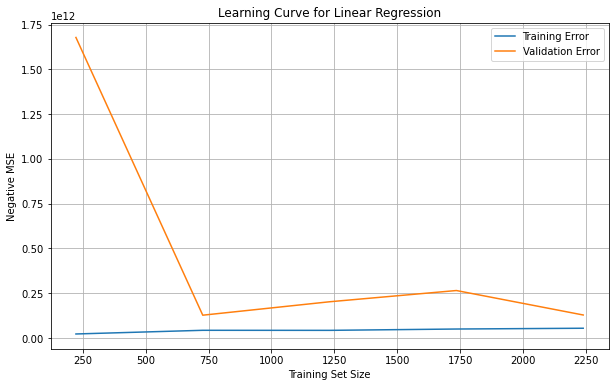

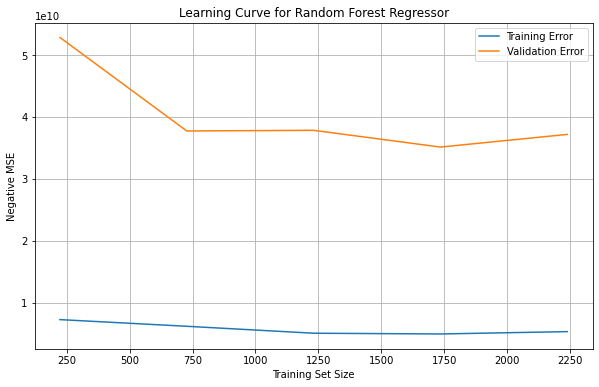

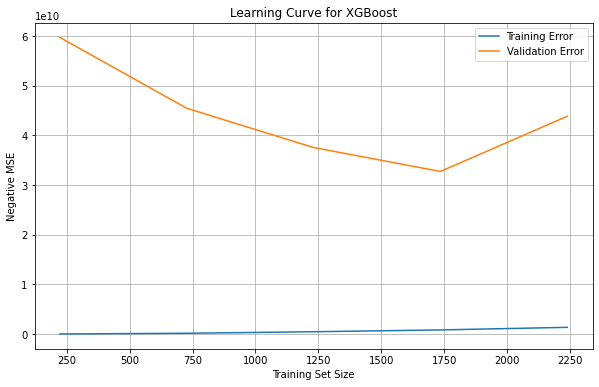

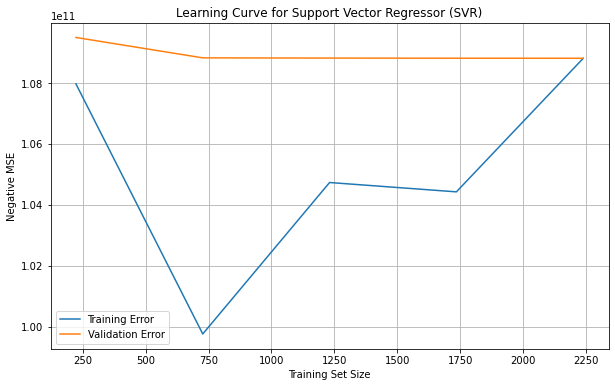

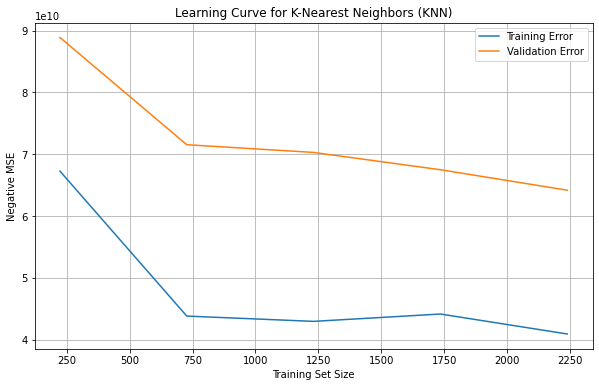

C:\Users\amiru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


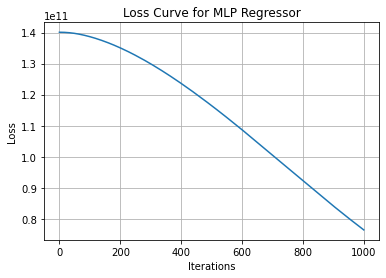

Results for Linear Regression:
MAE: 129552.9645
MSE: 56675070404.1466
RMSE: 238065.2650
R²: 0.5170

Results for Random Forest Regressor:
MAE: 79786.1027
MSE: 23830679032.7467
RMSE: 154371.8855
R²: 0.7969

Results for XGBoost:
MAE: 88286.2349
MSE: 41908902562.4950
RMSE: 204716.6397
R²: 0.6428

Results for Support Vector Regressor (SVR):
MAE: 185334.4842
MSE: 123129810594.0795
RMSE: 350898.5759
R²: -0.0494

Results for K-Nearest Neighbors (KNN):
MAE: 138461.0108
MSE: 80241109255.5523
RMSE: 283268.6168
R²: 0.3162

Results for MLP Regressor:
MAE: 249621.0020
MSE: 167173053069.4657
RMSE: 408868.0142
R²: -0.4247



In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import xgboost as xgb

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Support Vector Regressor (SVR)': SVR(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Prepare the results dictionary
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and round to 1 decimal place
    y_pred = model.predict(X_test)
    y_pred_rounded = np.round(y_pred, 1)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred_rounded)
    mse = mean_squared_error(y_test, y_pred_rounded)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_rounded)
    
    # Store results
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }
    
    # Plot Learning curve (for models that support it)
    if model_name != 'MLP Regressor':
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error")
        plt.plot(train_sizes, -test_scores.mean(axis=1), label="Validation Error")
        plt.title(f'Learning Curve for {model_name}')
        plt.xlabel('Training Set Size')
        plt.ylabel('Negative MSE')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Plot Loss curve for MLP Regressor
    if model_name == 'MLP Regressor':
        plt.plot(model.loss_curve_)
        plt.title(f'Loss Curve for {model_name}')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()

# Output the evaluation metrics
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"R²: {metrics['R²']:.4f}\n")


# Prediction Output

In [82]:
# Create a dictionary to store predictions for each model
test_predictions = {}

# Loop through each model, make predictions, and store them
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Predict on the test set|
    test_predictions[model_name] = y_pred

# Convert the predictions dictionary into a DataFrame for better readability
predictions_df = pd.DataFrame(test_predictions)

# Add the actual values for comparison
predictions_df['Actual'] = y_test

# Display the predictions
predictions_df

,Linear Regression,Random Forest Regressor,XGBoost,Support Vector Regressor (SVR),K-Nearest Neighbors (KNN),MLP Regressor,Actual
0,2.008162e+05,2.849000e+05,3.017472e+05,349944.815295,270000.0,175524.398622,298000.0
1,1.401687e+06,1.282060e+06,1.203672e+06,349987.538890,652600.0,168639.884957,1400000.0
2,4.522920e+05,4.606772e+05,4.227228e+05,349877.657503,278600.0,137087.734029,470000.0
3,3.911440e+05,3.756933e+05,3.823394e+05,349949.879708,382000.0,144029.830929,380000.0
4,3.212349e+05,3.136064e+05,2.874693e+05,349893.031389,249377.6,147409.487208,295000.0
...,...,...,...,...,...,...,...
1195,3.842354e+05,3.507488e+05,3.213587e+05,350050.879997,330000.0,218159.027760,299000.0
1196,7.785369e+05,5.912400e+05,5.644524e+05,350135.768149,303200.0,291365.758409,600000.0
1197,3.617228e+05,3.740954e+05,4.517993e+05,349951.734536,287100.0,144070.481099,350000.0
1198,4.651004e+05,4.094400e+05,4.068852e+05,350059.044135,302200.0,373498.269497,340000.0
